In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
get_data_dir = os.path.join(parent_dir, 'get_data')
data_dir = os.path.join(get_data_dir, 'output')
file_path = os.path.join(data_dir, 'battles.csv')

output_dir = os.path.join(cwd, 'output')
os.makedirs(output_dir, exist_ok=True)

data = pd.read_csv(file_path)

victors = []

for row in data.itertuples(index=False):
    team1 = [row[8], row[10], row[12]]
    team2 = [row[14], row[16], row[18]]

    if row[4] == 'victory':
        victor = 1 if row[5] in set(team1) else 2
    elif row[4] == 'defeat':
        victor = 2 if row[5] in set(team1) else 1
    else:
        victor = 0
    
    victors.append(victor)

df = data[['Mode', 'Map']]
df.insert(2, 'Victor', victors)
df = pd.concat([df, data.iloc[:, range(8, 19, 2)]], axis=1)

df.to_csv(os.path.join(output_dir, 'victors.csv'), index=False)

display(df)

,Mode,Map,Victor,"Brawler 1,1","Brawler 1,2","Brawler 1,3","Brawler 2,1","Brawler 2,2","Brawler 2,3"
0,hotZone,Dueling Beetles,2,CROW,BROCK,FANG,MR. P,LARRY & LAWRIE,JESSIE
1,hotZone,Dueling Beetles,2,CROW,BROCK,FANG,MR. P,LARRY & LAWRIE,JESSIE
2,knockout,Belle's Rock,1,SHELLY,DYNAMIKE,SPROUT,PIPER,MORTIS,GROM
3,knockout,Belle's Rock,1,SHELLY,DYNAMIKE,SPROUT,PIPER,MORTIS,GROM
4,bounty,Hideout,1,MANDY,GENE,SPROUT,MELODIE,BELLE,BYRON
...,...,...,...,...,...,...,...,...,...
5509,brawlBall,Penalty Kick,2,CARL,CHESTER,COLT,BUSTER,BYRON,RICO
5510,brawlBall,Penalty Kick,1,CARL,CHESTER,COLT,BUSTER,BYRON,RICO
5511,gemGrab,Undermine,1,SPROUT,PIPER,MEG,CHESTER,BELLE,PAM
5512,gemGrab,Undermine,2,SPROUT,PIPER,MEG,CHESTER,BELLE,PAM


In [3]:
brawlers = sorted(list(set(df.iloc[:, 3:].to_numpy().ravel())))

winrates = pd.DataFrame({'Wins': [0]*len(brawlers), 'Games': [0]*len(brawlers)}, index=brawlers)

indices = {}

for row in df.itertuples(index=False):
    victor = row[2]
    team1 = row[3:6]
    team2 = row[6:9]

    for brawler in team1:
        winrates.loc[brawler, 'Games'] += 1

        if victor == 1:
            winrates.loc[brawler, 'Wins'] += 1

    for brawler in team2:
        winrates.loc[brawler, 'Games'] += 1

        if victor == 2:
            winrates.loc[brawler, 'Wins'] += 1

rates = winrates['Wins'].div(winrates['Games'])
winrates.insert(2, 'Win Rate', rates)

winrates.to_csv(os.path.join(output_dir, 'winrates.csv'))

display(winrates)

,Wins,Games,Win Rate
8-BIT,57,120,0.475000
AMBER,189,412,0.458738
ANGELO,359,788,0.455584
ASH,21,38,0.552632
BARLEY,445,851,0.522914
...,...,...,...
STU,190,396,0.479798
SURGE,414,762,0.543307
TARA,49,88,0.556818
TICK,149,329,0.452888


,8-BIT,AMBER,ANGELO,ASH,BARLEY,BEA,BELLE,BERRY,BIBI,BO,...,SANDY,SHELLY,SPIKE,SPROUT,SQUEAK,STU,SURGE,TARA,TICK,WILLOW
8-BIT,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.533333,0.000000,NaN,0.600000,...,0.333333,0.000000,0.000000,0.714286,NaN,NaN,0.000000,0.800000,NaN,NaN
AMBER,1.0,NaN,0.428571,0.666667,0.450000,0.333333,0.750000,0.411765,0.384615,0.421053,...,0.338235,0.666667,0.478261,0.333333,0.0,0.451613,0.450980,0.000000,NaN,0.400000
ANGELO,0.0,0.571429,NaN,NaN,0.513514,0.500000,0.478723,0.272727,0.461538,0.571429,...,0.294118,0.800000,0.666667,0.568182,1.0,0.500000,0.444444,NaN,0.571429,NaN
ASH,1.0,0.333333,NaN,NaN,NaN,NaN,NaN,0.800000,0.600000,0.000000,...,0.700000,NaN,0.600000,0.333333,NaN,NaN,0.200000,NaN,NaN,0.000000
BARLEY,1.0,0.550000,0.486486,NaN,NaN,0.500000,0.363636,0.500000,0.360000,0.375000,...,0.537313,0.625000,0.451613,0.566667,0.2,0.519231,0.468354,NaN,0.595745,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STU,NaN,0.548387,0.500000,NaN,0.480769,0.400000,0.500000,0.421053,0.555556,0.500000,...,0.436364,0.250000,0.230769,0.500000,NaN,NaN,0.250000,0.250000,0.750000,NaN
SURGE,1.0,0.549020,0.555556,0.800000,0.531646,1.000000,1.000000,0.611111,0.625000,0.894737,...,0.512000,0.666667,0.272727,0.400000,NaN,0.750000,NaN,0.142857,0.888889,0.636364
TARA,0.2,1.000000,NaN,NaN,NaN,NaN,0.000000,0.666667,NaN,NaN,...,0.307692,NaN,0.000000,NaN,NaN,0.750000,0.857143,NaN,NaN,NaN
TICK,NaN,NaN,0.428571,NaN,0.404255,1.000000,0.655172,0.142857,0.500000,0.600000,...,0.000000,0.333333,0.333333,0.405405,0.2,0.250000,0.111111,NaN,NaN,0.000000


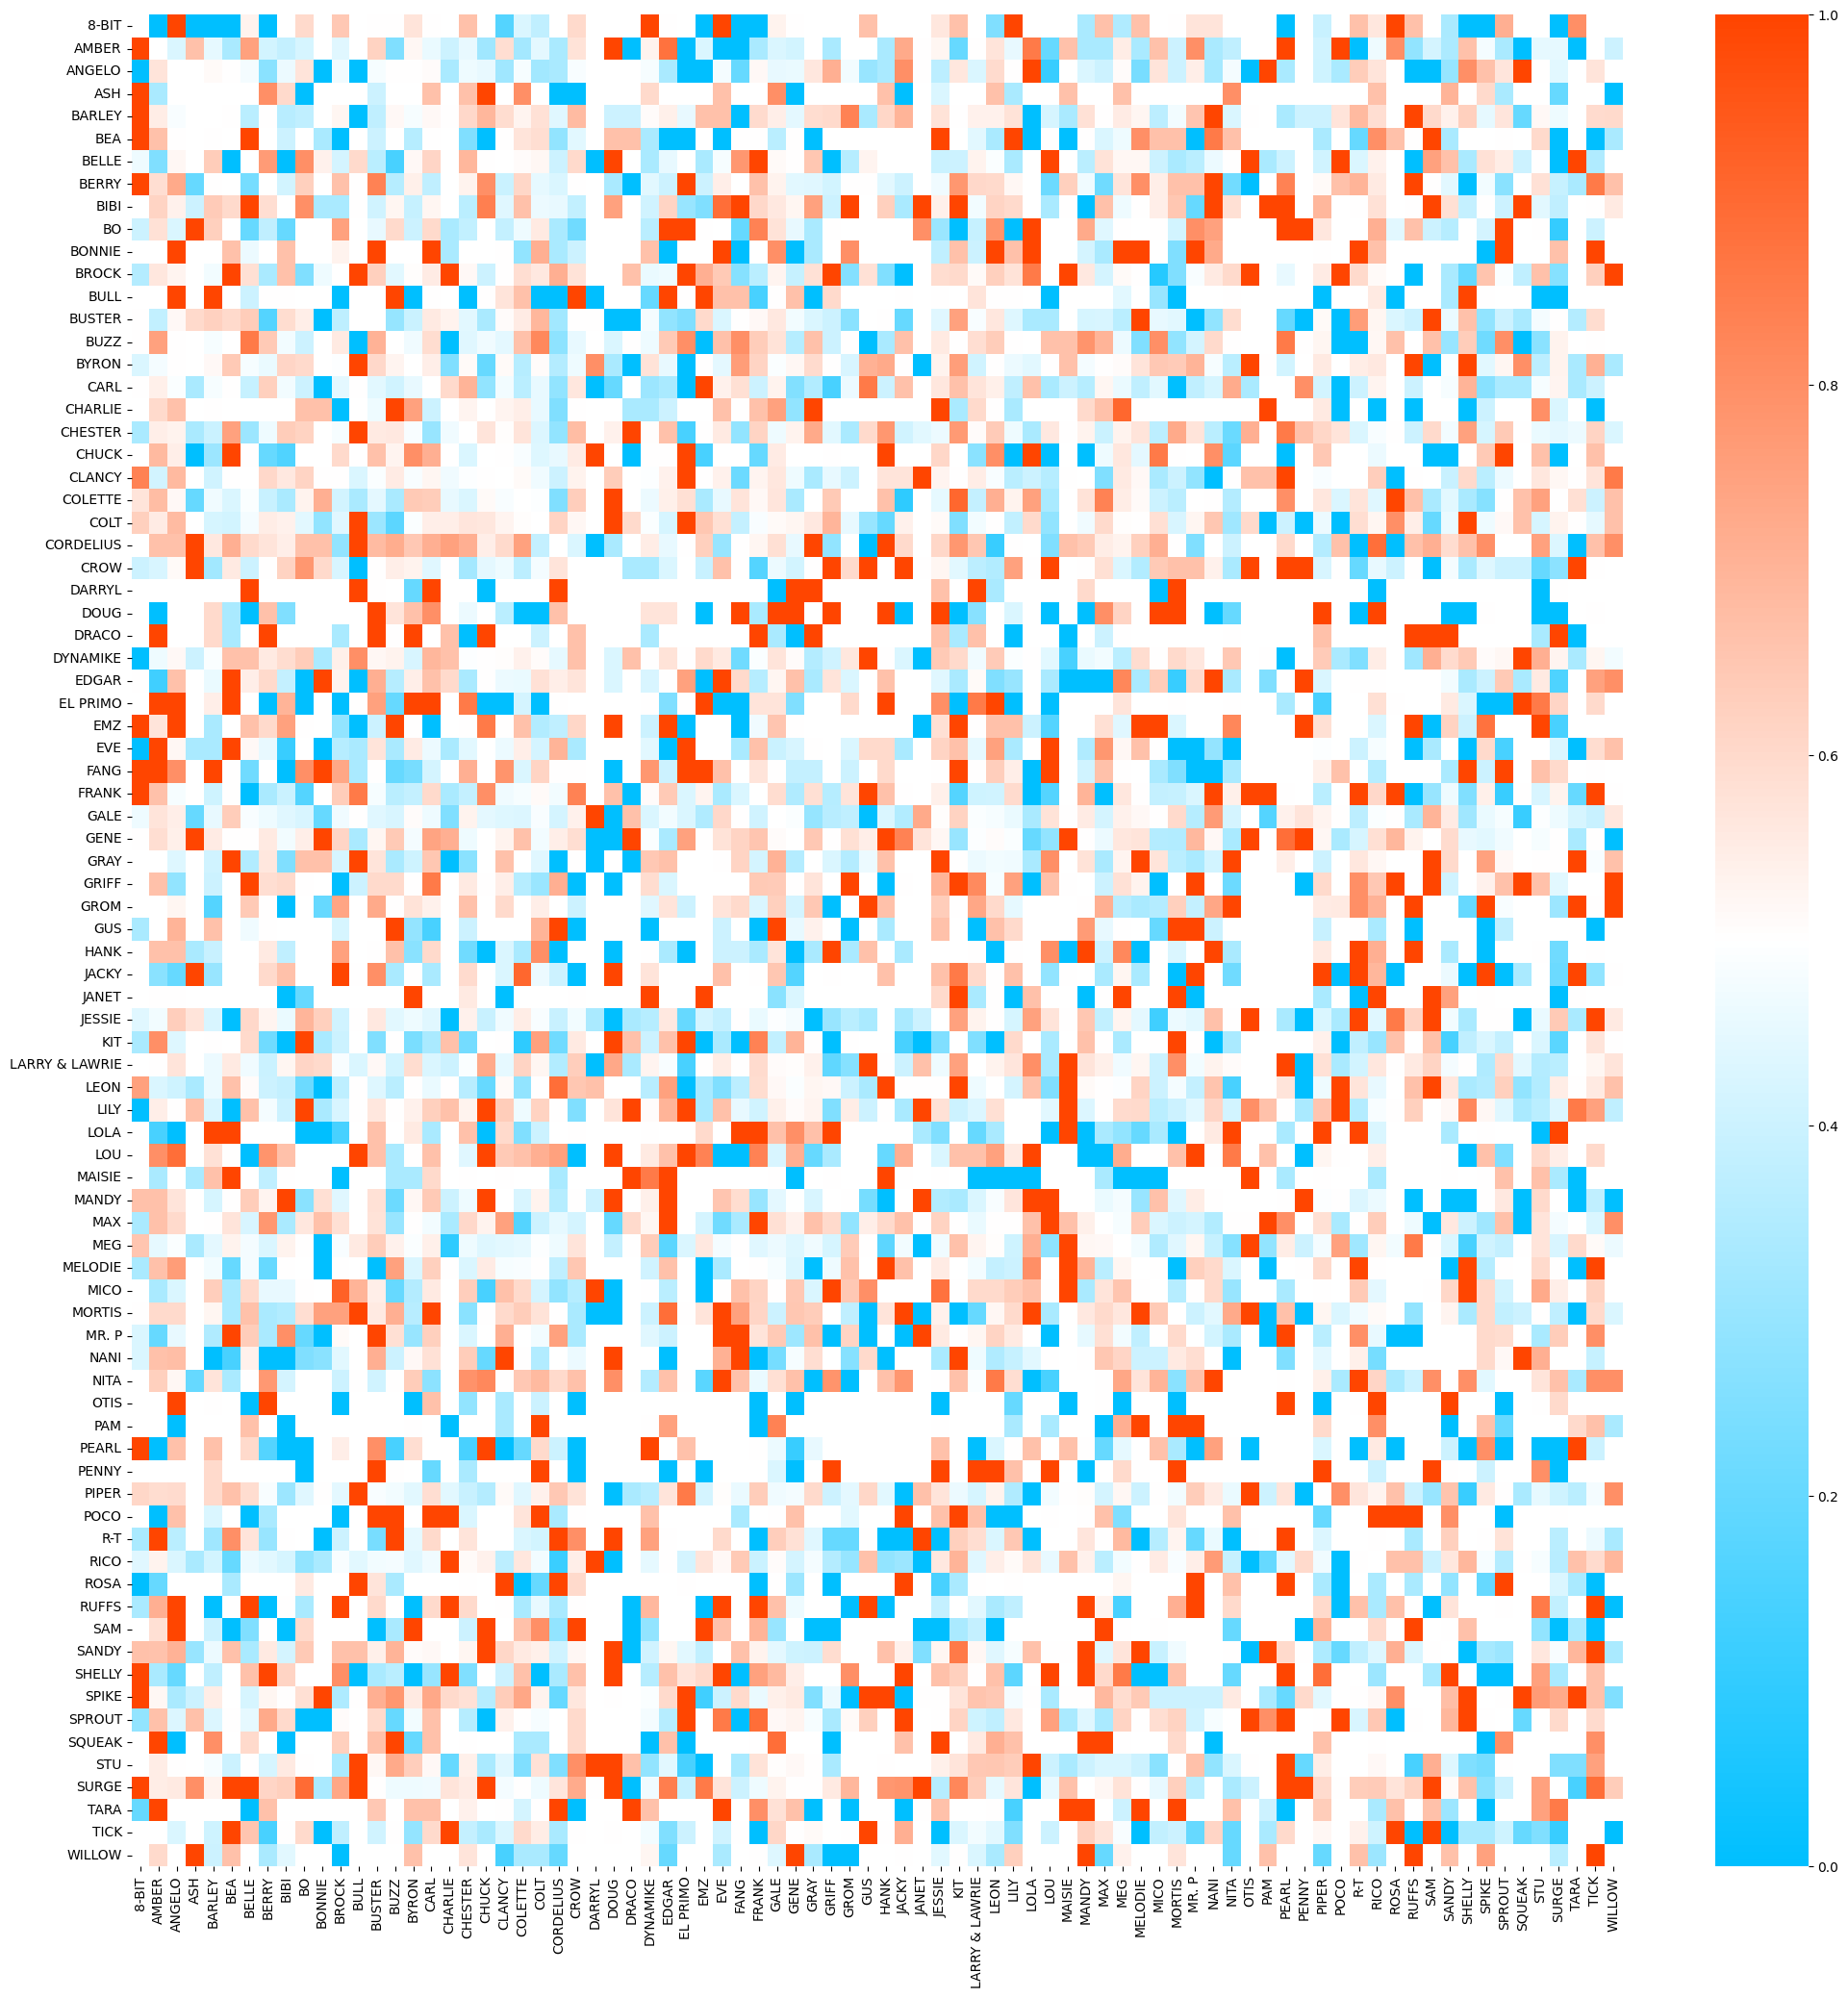

In [6]:
against_wins = pd.DataFrame(index=brawlers, columns=brawlers)
against_wins = against_wins.fillna(0)

against_games = pd.DataFrame(index=brawlers, columns=brawlers)
against_games = against_games.fillna(0)

for row in df.itertuples(index=False):
    victor = row[2]
    
    if victor == 0:
        continue

    team1 = row[3:6]
    team2 = row[6:9]

    for brawler1 in team1:
        for brawler2 in team2:

            against_games.loc[brawler1, brawler2] += 1
            against_games.loc[brawler2, brawler1] += 1
        
            if victor == 1:
                against_wins.loc[brawler1, brawler2] += 1
            else:
                against_wins.loc[brawler2, brawler1] += 1

against_winrates = against_wins.div(against_games)

plt.figure(figsize=(20,20))
cmap = LinearSegmentedColormap.from_list('coolwarm_custom', ['#00BFFF', '#FFFFFF', '#FF4500'], N=256)
sns.heatmap(against_winrates, annot=False, cmap=cmap, vmin=0, vmax=1)

against_winrates.to_csv(os.path.join(output_dir, 'against_winrates.csv'))
against_wins.to_csv(os.path.join(output_dir, 'against_wins.csv'))
against_games.to_csv(os.path.join(output_dir, 'against_games.csv'))
plt.savefig(os.path.join(output_dir, 'against_heatmap.png'), format='png', dpi=300, bbox_inches='tight')

display(against_winrates)
plt.show()

,8-BIT,AMBER,ANGELO,ASH,BARLEY,BEA,BELLE,BERRY,BIBI,BO,...,SANDY,SHELLY,SPIKE,SPROUT,SQUEAK,STU,SURGE,TARA,TICK,WILLOW
8-BIT,NaN,NaN,0.000000,NaN,0.000000,NaN,0.428571,0.000000,0.666667,NaN,...,0.400000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN
AMBER,NaN,NaN,0.333333,0.333333,0.187500,NaN,0.500000,1.000000,0.588235,0.285714,...,0.613636,NaN,0.625000,0.000000,NaN,0.461538,0.291667,0.000000,0.500000,0.333333
ANGELO,0.0,0.333333,NaN,NaN,0.518519,0.400000,0.283333,0.608696,1.000000,0.444444,...,0.307692,0.666667,0.500000,0.571429,0.600000,0.523810,0.454545,NaN,0.294118,NaN
ASH,NaN,0.333333,NaN,NaN,0.800000,NaN,NaN,NaN,0.666667,NaN,...,0.000000,NaN,1.000000,NaN,NaN,NaN,0.333333,NaN,NaN,NaN
BARLEY,0.0,0.187500,0.518519,0.800000,NaN,0.857143,0.384615,0.500000,0.473684,0.444444,...,0.609756,0.466667,0.406250,0.500000,0.666667,0.523810,0.640625,0.333333,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STU,NaN,0.461538,0.523810,NaN,0.523810,0.533333,0.571429,0.571429,0.666667,NaN,...,0.529412,0.000000,0.533333,0.666667,NaN,NaN,0.560000,NaN,NaN,1.000000
SURGE,NaN,0.291667,0.454545,0.333333,0.640625,0.000000,1.000000,0.533333,0.594595,0.750000,...,0.534247,0.571429,0.677419,0.714286,0.857143,0.560000,NaN,0.833333,0.000000,0.454545
TARA,0.0,0.000000,NaN,NaN,0.333333,NaN,NaN,1.000000,NaN,0.000000,...,0.000000,NaN,0.500000,NaN,NaN,NaN,0.833333,NaN,NaN,0.666667
TICK,1.0,0.500000,0.294118,NaN,0.000000,0.500000,0.600000,0.600000,0.333333,NaN,...,0.538462,0.666667,0.333333,0.333333,0.333333,NaN,0.000000,NaN,NaN,NaN


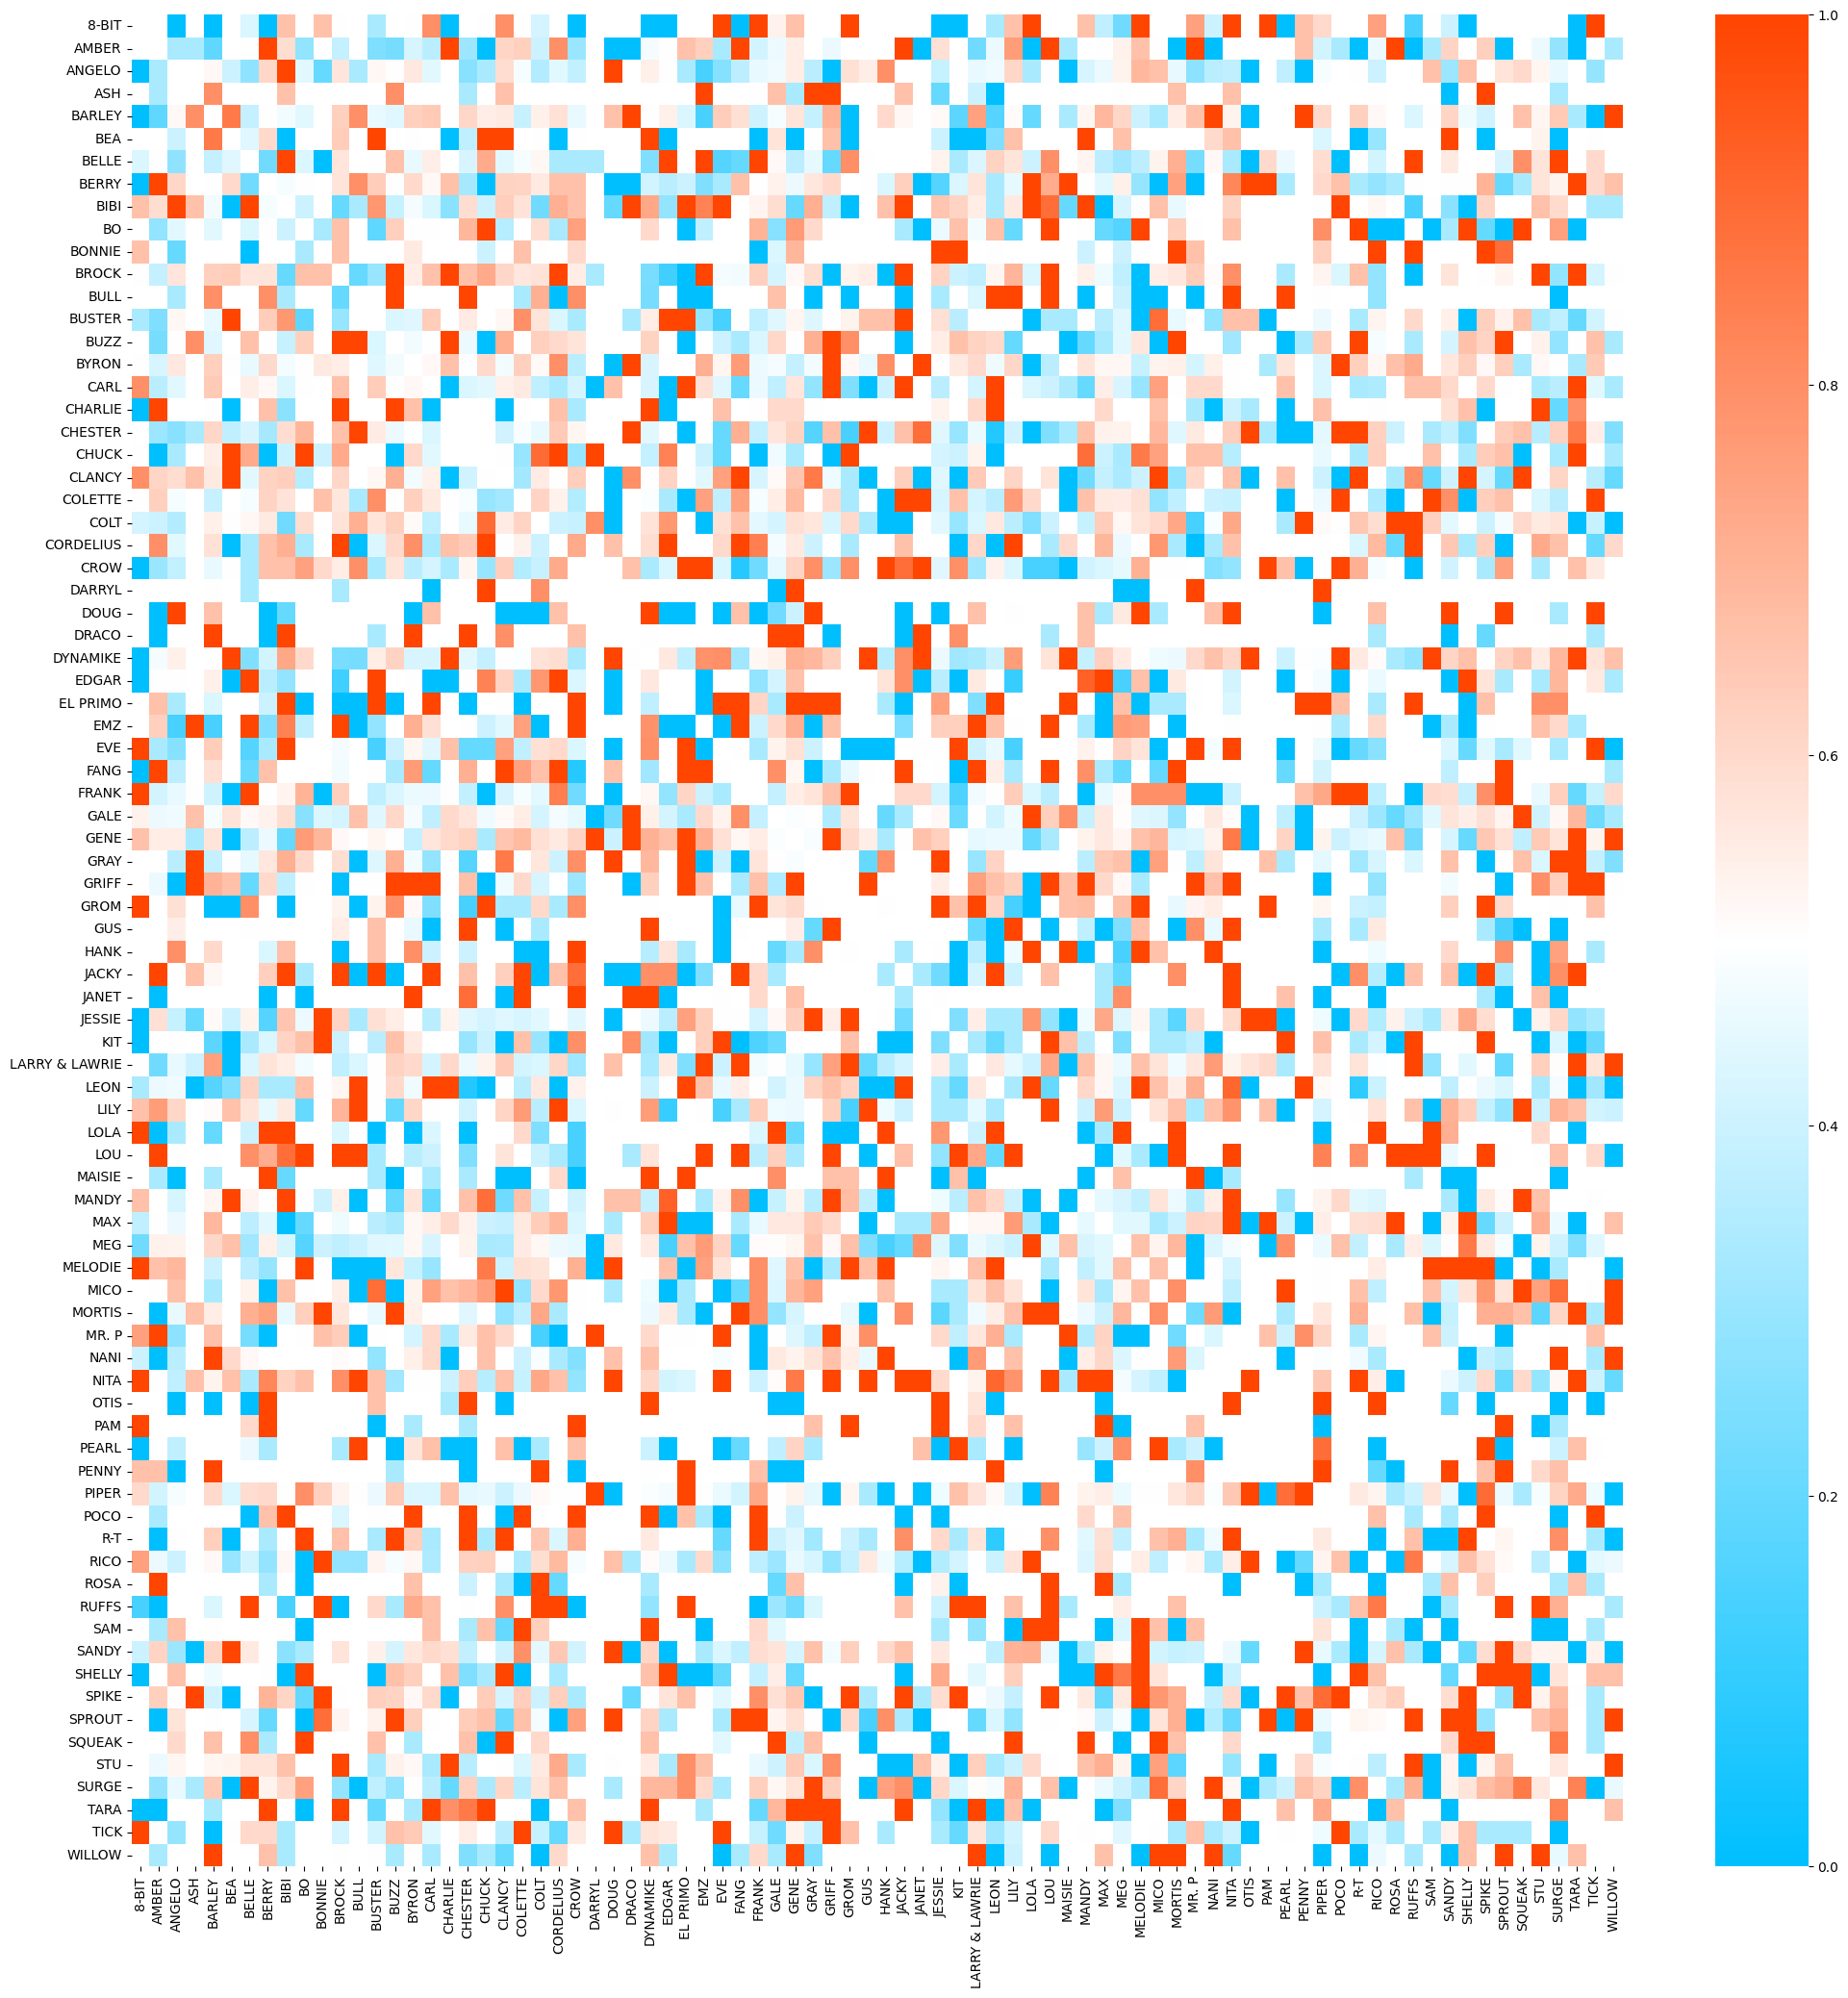

In [7]:
with_wins = pd.DataFrame(index=brawlers, columns=brawlers)
with_wins = with_wins.fillna(0)

with_games = pd.DataFrame(index=brawlers, columns=brawlers)
with_games = with_games.fillna(0)

for row in df.itertuples(index=False):
    victor = row[2]

    if victor == 0:
        continue

    team1 = row[3:6]
    team2 = row[6:9]

    for i in range(len(team1)):
        for j in range(i+1, len(team1)):    
            brawler1 = team1[i]
            brawler2 = team1[j]

            with_games.loc[brawler1, brawler2] += 1
            with_games.loc[brawler2, brawler1] += 1
        
            if victor == 1:
                with_wins.loc[brawler1, brawler2] += 1
                with_wins.loc[brawler2, brawler1] += 1

            brawler1 = team2[i]
            brawler2 = team2[j]

            with_games.loc[brawler1, brawler2] += 1
            with_games.loc[brawler2, brawler1] += 1
        
            if victor == 2:
                with_wins.loc[brawler1, brawler2] += 1
                with_wins.loc[brawler2, brawler1] += 1     
    
with_winrates = with_wins.div(with_games)

plt.figure(figsize=(20,20))
cmap = LinearSegmentedColormap.from_list('coolwarm_custom', ['#00BFFF', '#FFFFFF', '#FF4500'], N=256)
sns.heatmap(with_winrates, annot=False, cmap=cmap, vmin=0, vmax=1)

with_wins.to_csv(os.path.join(output_dir, 'with_wins.csv'))
with_winrates.to_csv(os.path.join(output_dir, 'with_winrates.csv'))
with_games.to_csv(os.path.join(output_dir, 'with_games.csv'))
plt.savefig(os.path.join(output_dir, 'with_heatmap.png'), format='png', dpi=300, bbox_inches='tight')

display(with_winrates)
plt.show()